In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/fastai1 dataset/FastAI1 DataSet"))

# Any results you write to the current directory are saved as output.

['valid', 'pie_value.png', 'train']


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs=64

In [4]:
train = "../input/fastai1 dataset/FastAI1 DataSet/train"
valid = "../input/fastai1 dataset/FastAI1 DataSet/valid"
path= "../input/fastai1 dataset/FastAI1 DataSet"
fnames = get_image_files("../input/fastai1 dataset/FastAI1 DataSet/valid/hg")
fnames[:5]

[PosixPath('../input/fastai1 dataset/FastAI1 DataSet/valid/hg/5.jpeg'),
 PosixPath('../input/fastai1 dataset/FastAI1 DataSet/valid/hg/11.jpeg'),
 PosixPath('../input/fastai1 dataset/FastAI1 DataSet/valid/hg/1.jpeg'),
 PosixPath('../input/fastai1 dataset/FastAI1 DataSet/valid/hg/10.jpeg'),
 PosixPath('../input/fastai1 dataset/FastAI1 DataSet/valid/hg/18.jpeg')]

In [5]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path,no_check=True,size=224,bs=bs, num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (724 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lg,lg,lg,lg,lg
Path: ../input/fastai1 dataset/FastAI1 DataSet;

Valid: LabelList (84 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lg,lg,lg,lg,lg
Path: ../input/fastai1 dataset/FastAI1 DataSet;

Test: None

In [6]:

print(data.classes)
len(data.classes),data.c

['hg', 'lg', 'pc', 'sg']


(4, 4)

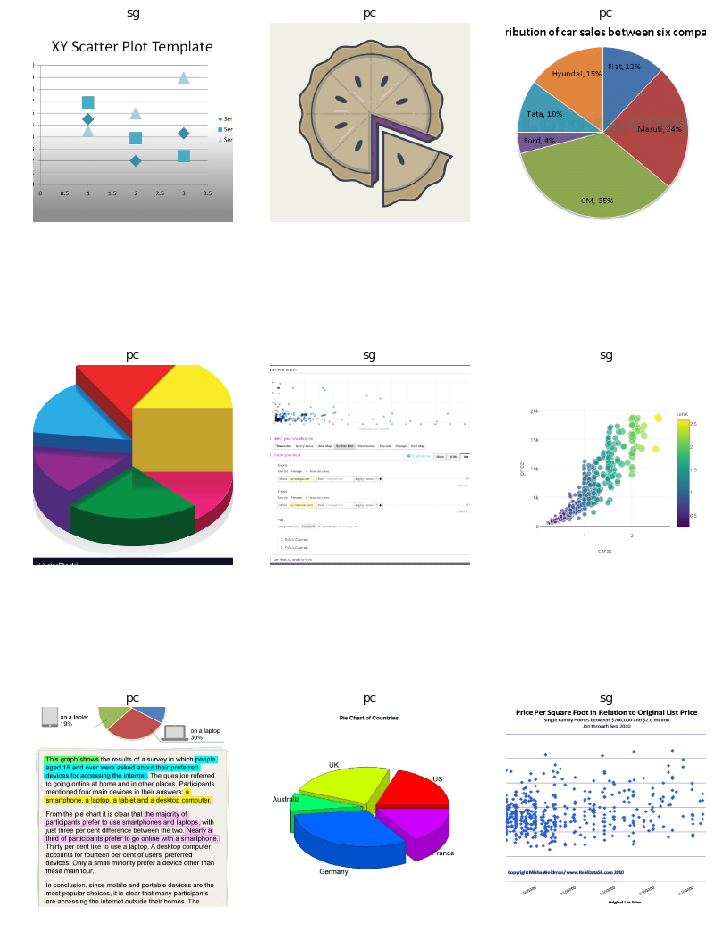

In [7]:
data.show_batch(rows=3, figsize=(10,15))

In [8]:
#doc(create_cnn)
learn = cnn_learner(data, models.resnet34, metrics=error_rate,model_dir = '/tmp/')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 116MB/s]


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


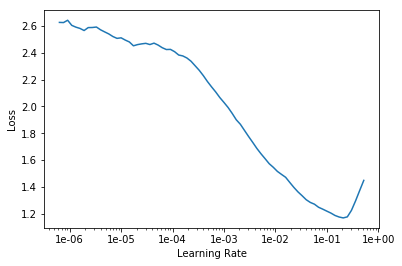

In [10]:
learn.recorder.plot()


In [11]:
lr=1e-3

In [12]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,2.094456,0.683424,0.250000,00:22
1,1.323416,0.233137,0.059524,00:21
2,0.945935,0.203803,0.059524,00:21
3,0.710336,0.191204,0.059524,00:21
4,0.572274,0.191574,0.059524,00:20


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

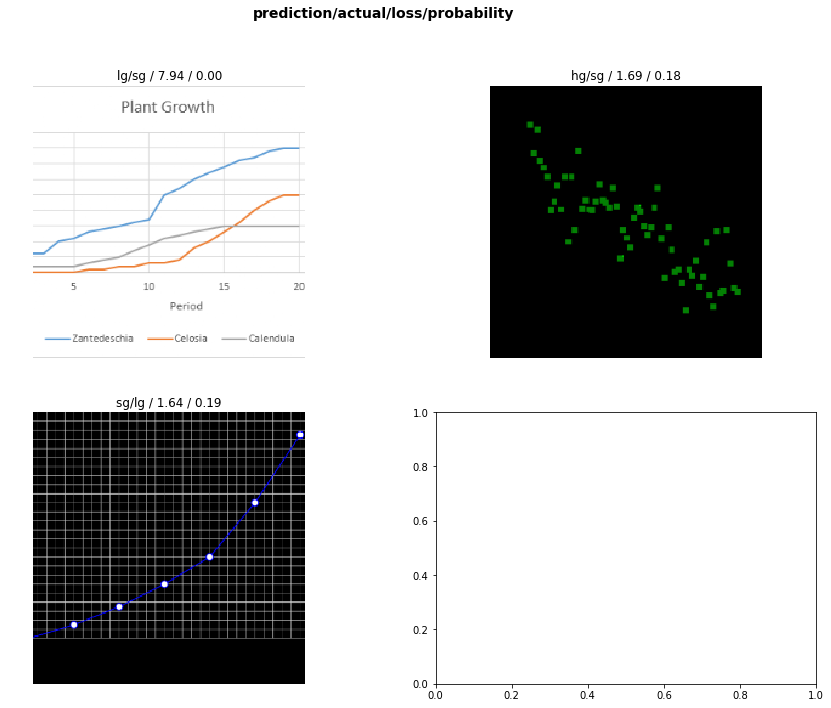

In [14]:
interp.plot_top_losses(3, figsize=(15,11))

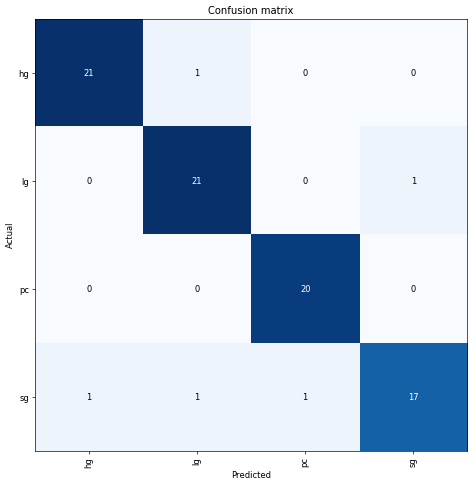

In [15]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [16]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


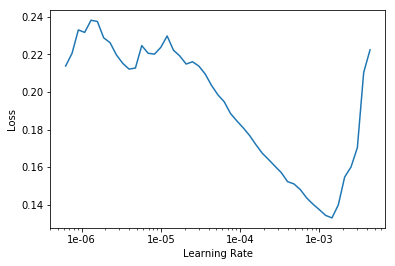

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5,slice(1e-6,lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.192619,0.188618,0.059524,00:21
1,0.183684,0.203831,0.059524,00:22
2,0.163633,0.202963,0.059524,00:21
3,0.137075,0.200811,0.059524,00:22
4,0.121696,0.205252,0.059524,00:22


In [19]:
learn.freeze()

In [20]:
learn.fit_one_cycle(1, max_lr=slice(2e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.087885,0.196195,0.059524,00:21


In [21]:
learn.save('stage-1')

In [22]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (724 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lg,lg,lg,lg,lg
Path: ../input/fastai1 dataset/FastAI1 DataSet;

Valid: LabelList (84 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lg,lg,lg,lg,lg
Path: ../input/fastai1 dataset/FastAI1 DataSet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

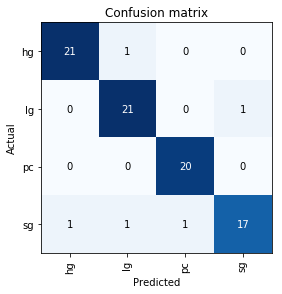

In [24]:
interp.plot_confusion_matrix()

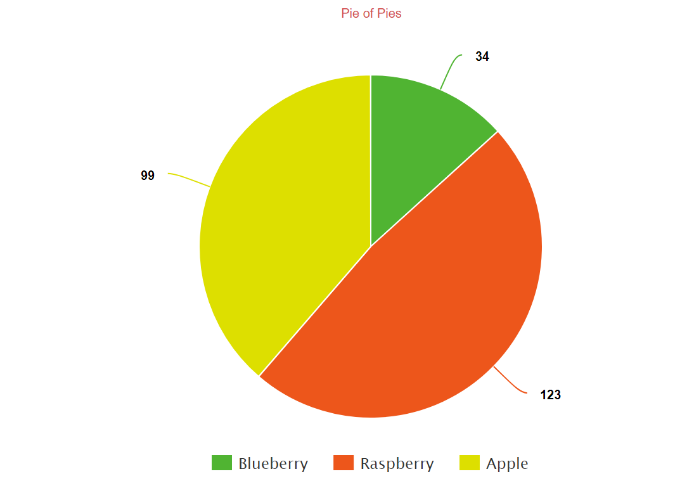

In [25]:
img = open_image(path+'/pie_value.png')
img

In [26]:
classes = ['hg', 'lg', 'pc', 'sg']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)

In [27]:
learn = cnn_learner(data2, models.resnet34,model_dir = '/tmp/').load('stage-1')

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)


In [29]:
pred_class

Category pc